### Test WENO


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from trapezoidal import rk_integrator
from scipy.integrate import odeint

%load_ext autoreload
%autoreload 2


def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
        
def plot_results(x, L_list, tlist):
    n_t = x[:,2:]
    plt.pcolormesh(tlist, L_list, n_t.T, shading='nearest')
    plt.ylabel('L (particle size)')
    plt.xlabel('time')
    plt.colorbar()
    plt.show()

    plt.plot(tlist, x[:,0]) 
    plt.title('supersaturation')
    plt.xlabel('t')
    plt.show()

    plt.plot(tlist, x[:,1]) 
    plt.title('volume')
    plt.xlabel('t')

#### Find Reference

  0%|          | 0/300 [00:00<?, ?it/s]

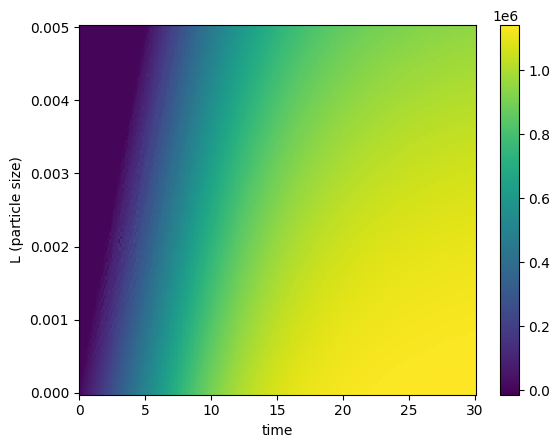

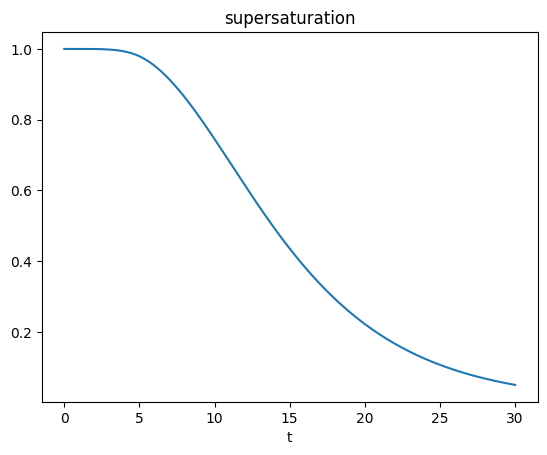

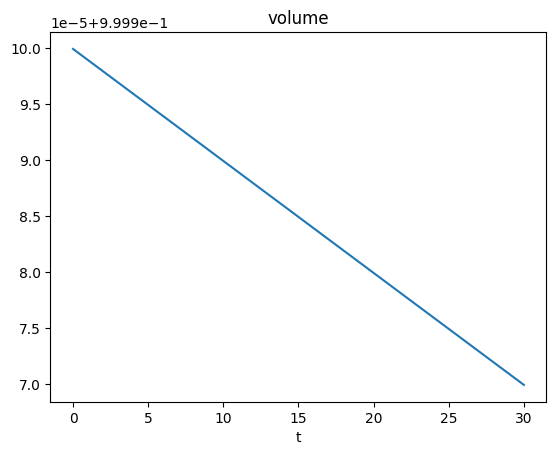

In [3]:
nL = 100
nT = 3*nL
L_list = np.linspace(0,0.005, nL)  # uniform dL assumed below
tlist = np.linspace(0,30,nT)


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution
x0 = np.hstack([S0, V0, n0])

# target parameters we will try to recover
p = {
    'L_list' : L_list,
    'E' :  1e-6, #evaporation rate
    'rho' : 1200, # density of the crystal
    'k_v' : 1, #goes in N_C, volumetric shape factor
    'k_g' : 1e-3, #growth rate constant m/s
    'g' : 1, #power constant for growth
    'k_N' : 1e5, #nucleation rate constant 
    'alpha' :2, #power constant for nucleation
    'weno': True  # use weno or not for differentiation w.r.t. L
     }

# x_t_ref = odeint(evalf, y0=x_ref, t=tlist, args=(p,None))
x_ref = rk_integrator(x0, tlist, p)
plot_results(x_ref, L_list, tlist)

#### With Weno 


In [9]:
L_list = np.linspace(0,1e-2, 1000)
tlist = np.linspace(0,1e-2,1000) 


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e-3, #growth rate constant m/s
     'g' : 1, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :2, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': True  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x = np.hstack([S0, V0, n0])
x_t = odeint(evalf, y0=x, t=tlist, args=(p,None))


#plot results
n_t = x_t[:,2:]
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')

TypeError: evalf() takes 2 positional arguments but 4 were given

### Without Weno

In [ ]:



L_list = np.linspace(0,1e-2, 1000)
tlist = np.linspace(0,3,1000) 


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e-3, #growth rate constant m/s
     'g' : 1, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :2, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': False  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x = np.hstack([S0, V0, n0])
x_t = odeint(evalf, y0=x, t=tlist, args=(p,None))


#plot results
n_t = x_t[:,2:]
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')